#K-Means Clustering Cereals

There are 77 types of cereal in the dataset. I am using K-Means to cluster cereals by nutritional value. I use both K-Means++ method for clustering. I then explore the data using Means Shift. With Mean Shift, the computer determines the number of clusters for cereal. I compare the results to the K-Mean outcomes. 

In [94]:
import pandas as pd 
import numpy as np
import itertools
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import KMeans
from sklearn import preprocessing 

In [2]:
df = pd.read_csv('cereals.csv')
df.shape

(77, 15)

In [3]:
columns = df.columns
index_list = []
for column in columns: 
    indexes = (df[df[column] == -1]).index.tolist()
    index_list.append(indexes)
index_list = list(itertools.chain(*index_list))
index_list

[57, 57, 4, 20]

In [4]:
missing_values = df.iloc[index_list[1:], :]

In [5]:
missing_values

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
57,Quaker_Oatmeal,Q,H,100,5,2,0,2.7,-1,-1,110,0,1,1,0.67
4,Almond_Delight,R,C,110,2,2,200,1.0,14,8,-1,25,3,1,0.75
20,Cream_of_Wheat_(Quick),N,H,100,3,0,80,1.0,21,0,-1,0,2,1,1.00


##Normalized the data to 100 calories for all cereals

In [6]:
col_to_adj = df.columns[4:].tolist()
df['servings_per_100'] = df['calories'] / 100
for col in col_to_adj:
    df[col] = df[col] / df['servings_per_100']

In [7]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,servings_per_100
0,100%_Bran,N,C,70,5.714286,1.428571,185.714286,14.285714,7.142857,8.571429,400.000000,35.714286,4.285714,1.428571,0.471429,0.7
1,100%_Natural_Bran,Q,C,120,2.500000,4.166667,12.500000,1.666667,6.666667,6.666667,112.500000,0.000000,2.500000,0.833333,0.833333,1.2
2,All-Bran,K,C,70,5.714286,1.428571,371.428571,12.857143,10.000000,7.142857,457.142857,35.714286,4.285714,1.428571,0.471429,0.7
3,All-Bran_with_Extra_Fiber,K,C,50,8.000000,0.000000,280.000000,28.000000,16.000000,0.000000,660.000000,50.000000,6.000000,2.000000,1.000000,0.5
4,Almond_Delight,R,C,110,1.818182,1.818182,181.818182,0.909091,12.727273,7.272727,-0.909091,22.727273,2.727273,0.909091,0.681818,1.1


##Running a correlation on the data set that only includes complete values.

In [8]:
complete_values = df[(df.index != 4) & (df.index != 20) & (df.index != 57)]
complete_values.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,servings_per_100
0,100%_Bran,N,C,70,5.714286,1.428571,185.714286,14.285714,7.142857,8.571429,400.000000,35.714286,4.285714,1.428571,0.471429,0.7
1,100%_Natural_Bran,Q,C,120,2.500000,4.166667,12.500000,1.666667,6.666667,6.666667,112.500000,0.000000,2.500000,0.833333,0.833333,1.2
2,All-Bran,K,C,70,5.714286,1.428571,371.428571,12.857143,10.000000,7.142857,457.142857,35.714286,4.285714,1.428571,0.471429,0.7
3,All-Bran_with_Extra_Fiber,K,C,50,8.000000,0.000000,280.000000,28.000000,16.000000,0.000000,660.000000,50.000000,6.000000,2.000000,1.000000,0.5
5,Apple_Cinnamon_Cheerios,G,C,110,1.818182,1.818182,163.636364,1.363636,9.545455,9.090909,63.636364,22.727273,0.909091,0.909091,0.681818,1.1


###Identifying High Correlation Items

In [9]:
complete_corr = complete_values.corr()
complete_corr[(complete_corr > .7) | (complete_corr < -.7)]

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,servings_per_100
calories,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
protein,NaN,1.000000,NaN,NaN,0.744912,NaN,NaN,0.762235,NaN,NaN,NaN,NaN,NaN
fat,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sodium,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fiber,NaN,0.744912,NaN,NaN,1.000000,NaN,NaN,0.963040,NaN,NaN,0.899909,NaN,NaN
carbo,NaN,NaN,NaN,NaN,NaN,1.000000,-0.808153,NaN,NaN,NaN,NaN,NaN,NaN
sugars,NaN,NaN,NaN,NaN,NaN,-0.808153,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
potass,NaN,0.762235,NaN,NaN,0.963040,NaN,NaN,1.000000,NaN,NaN,0.872909,NaN,NaN
vitamins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
shelf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN


## Using linear regression to find (then replace) missing data for Potassium

In [10]:
lr = LinearRegression()
y = complete_values.loc[:, 'potass'].to_frame()
x = complete_values.loc[:, 'fiber'].to_frame()
lr.fit(x,y)
lr.predict(1)

array([[ 65.84859938]])

###For Almond Delight and Cream of Wheat Quick the potassium should be 66. 

In [11]:
df.loc[4,'potass'] = 66
df.loc[20,'potass'] = 66

I used the mean values of the complete data set to estiamte the values of carbs and sugar for Quaker Oatmeal

In [12]:
carbo_mean = np.array(complete_values.carbo).mean()
sugars_mean = np.array(complete_values.sugars).mean()
carbo = int(round(carbo_mean))
sugars = int(round(sugars_mean))
carbo, sugars

(14, 6)

In [13]:
df.loc[57,'carbo'] = carbo
df.loc[57,'sugars'] = sugars

In [14]:
df.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'servings_per_100'],
      dtype='object')

#K-Means

I removed the calories column because the data is normalized to 100 calories to compare across other features.

In [15]:
 df_km = df.loc[:, ['protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'weight', 'cups']]
df_km.head()

,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups
0,5.714286,1.428571,185.714286,14.285714,7.142857,8.571429,400.000000,35.714286,1.428571,0.471429
1,2.500000,4.166667,12.500000,1.666667,6.666667,6.666667,112.500000,0.000000,0.833333,0.833333
2,5.714286,1.428571,371.428571,12.857143,10.000000,7.142857,457.142857,35.714286,1.428571,0.471429
3,8.000000,0.000000,280.000000,28.000000,16.000000,0.000000,660.000000,50.000000,2.000000,1.000000
4,1.818182,1.818182,181.818182,0.909091,12.727273,7.272727,66.000000,22.727273,0.909091,0.681818


Normalizing the data distances so that one feature is not of greater weight than another.

In [16]:
df_scaled = preprocessing.scale(df_km)

##Testing K values

(Using K-Means++)

Six Clusters

In [17]:
km_six = KMeans(6)
km_six.fit(df_scaled)
clusters_six = km_six.predict(df_scaled)

Five Clusters 

In [18]:
km_five = KMeans(5)
km_five.fit(df_scaled)
clusters_five = km_five.predict(df_scaled)

Four Clusters

In [19]:
km_four = KMeans(4)
km_four.fit(df_scaled)
clusters_four = km_four.predict(df_scaled)

Three Clusters

In [20]:
km_three = KMeans(3)
km_three.fit(df_scaled)
clusters_three = km_three.predict(df_scaled)

Adding clusters to original dataframe. 

In [21]:
df['group6'] = clusters_six
df['group5'] = clusters_five
df['group4'] = clusters_four
df['group3'] = clusters_three
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,servings_per_100,group6,group5,group4,group3
0,100%_Bran,N,C,70,5.714286,1.428571,185.714286,14.285714,7.142857,8.571429,400.000000,35.714286,4.285714,1.428571,0.471429,0.7,3,2,2,2
1,100%_Natural_Bran,Q,C,120,2.500000,4.166667,12.500000,1.666667,6.666667,6.666667,112.500000,0.000000,2.500000,0.833333,0.833333,1.2,1,3,1,0
2,All-Bran,K,C,70,5.714286,1.428571,371.428571,12.857143,10.000000,7.142857,457.142857,35.714286,4.285714,1.428571,0.471429,0.7,3,2,2,2
3,All-Bran_with_Extra_Fiber,K,C,50,8.000000,0.000000,280.000000,28.000000,16.000000,0.000000,660.000000,50.000000,6.000000,2.000000,1.000000,0.5,2,2,2,2
4,Almond_Delight,R,C,110,1.818182,1.818182,181.818182,0.909091,12.727273,7.272727,66.000000,22.727273,2.727273,0.909091,0.681818,1.1,1,3,1,0


In [22]:
df.groupby('group6').count()['name'], df.groupby('group5').count()['name'], df.groupby('group4').count()['name'], df.groupby('group3').count()['name']

(group6
 0    23
 1    20
 2     1
 3     2
 4    21
 5    10
 Name: name, dtype: int64, group5
 0    23
 1    23
 2     3
 3    18
 4    10
 Name: name, dtype: int64, group4
 0    11
 1    40
 2     3
 3    23
 Name: name, dtype: int64, group3
 0    44
 1    30
 2     3
 Name: name, dtype: int64)

By looking at the counts, I can tell k=6 is not a good fit for the data. The size of clusters are not proportional. In groups 3, 4, and 5 one cluster includes 3 cereals. So, I am first looked at these clusters to make sure the three cereals are the same in each group. Then, at each of the other clusters to identify similarites between features. Last, identify, which grouping seems logical. 

In [23]:
group5_two = df[df['group5'] == 2]
group5_two['name']

0                    100%_Bran
2                     All-Bran
3    All-Bran_with_Extra_Fiber
Name: name, dtype: object

In [24]:
group4_two = df[df['group4'] == 2]
group4_two['name']

0                    100%_Bran
2                     All-Bran
3    All-Bran_with_Extra_Fiber
Name: name, dtype: object

In [25]:
group3_two = df[df['group3'] == 2]
group3_two['name']

0                    100%_Bran
2                     All-Bran
3    All-Bran_with_Extra_Fiber
Name: name, dtype: object

Cereals are the same in each group cluster.

In [34]:
group5_zero = df[df['group5'] == 0]
group5_zero = group5_zero.iloc[:, [0, 4, 5, 6, 7, 8, 9, 10, 11]]
group5_zero

,name,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
8,Bran_Chex,2.222222,1.111111,222.222222,4.444444,16.666667,6.666667,138.888889,27.777778
9,Bran_Flakes,3.333333,0.000000,233.333333,5.555556,14.444444,5.555556,211.111111,27.777778
11,Cheerios,5.454545,1.818182,263.636364,1.818182,15.454545,0.909091,95.454545,22.727273
15,Corn_Chex,1.818182,0.000000,254.545455,0.000000,20.000000,2.727273,22.727273,22.727273
16,Corn_Flakes,2.000000,0.000000,290.000000,1.000000,21.000000,2.000000,35.000000,25.000000
21,Crispix,1.818182,0.000000,200.000000,0.909091,19.090909,2.727273,27.272727,22.727273
23,Double_Chex,2.000000,0.000000,190.000000,1.000000,18.000000,5.000000,80.000000,25.000000
32,Grape_Nuts_Flakes,3.000000,1.000000,140.000000,3.000000,15.000000,5.000000,85.000000,25.000000
33,Grape-Nuts,2.727273,0.000000,154.545455,2.727273,15.454545,2.727273,81.818182,22.727273
38,Just_Right_Crunchy__Nuggets,1.818182,0.909091,154.545455,0.909091,15.454545,5.454545,54.545455,90.909091


In [33]:
group5_one = df[df['group5'] == 1]
group5_one = group5_one.iloc[:, [0, 4, 5, 6, 7, 8, 9, 10, 11]]
group5_one

,name,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
6,Apple_Jacks,1.818182,0.000000,113.636364,0.909091,10.000000,12.727273,27.272727,22.727273
10,Cap'n'Crunch,0.833333,1.666667,183.333333,0.000000,10.000000,10.000000,29.166667,20.833333
14,Cocoa_Puffs,0.909091,0.909091,163.636364,0.000000,10.909091,11.818182,50.000000,22.727273
17,Corn_Pops,0.909091,0.000000,81.818182,0.909091,11.818182,10.909091,18.181818,22.727273
18,Count_Chocula,0.909091,0.909091,163.636364,0.000000,10.909091,11.818182,59.090909,22.727273
22,Crispy_Wheat_&_Raisins,2.000000,1.000000,140.000000,2.000000,11.000000,10.000000,120.000000,25.000000
24,Froot_Loops,1.818182,0.909091,113.636364,0.909091,10.000000,11.818182,27.272727,22.727273
25,Frosted_Flakes,0.909091,0.000000,181.818182,0.909091,12.727273,10.000000,22.727273,22.727273
28,Fruitful_Bran,2.500000,0.000000,200.000000,4.166667,11.666667,10.000000,158.333333,20.833333
29,Fruity_Pebbles,0.909091,0.909091,122.727273,0.000000,11.818182,10.909091,22.727273,22.727273


In [37]:
group5_three = df[df['group5'] == 3]
group5_three = group5_three.iloc[:, [0, 4, 5, 6, 7, 8, 9, 10, 11]]
group5_three

,name,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
1,100%_Natural_Bran,2.500000,4.166667,12.500000,1.666667,6.666667,6.666667,112.500000,0.000000
4,Almond_Delight,1.818182,1.818182,181.818182,0.909091,12.727273,7.272727,66.000000,22.727273
5,Apple_Cinnamon_Cheerios,1.818182,1.818182,163.636364,1.363636,9.545455,9.090909,63.636364,22.727273
7,Basic_4,2.307692,1.538462,161.538462,1.538462,13.846154,6.153846,76.923077,19.230769
12,Cinnamon_Toast_Crunch,0.833333,2.500000,175.000000,0.000000,10.833333,7.500000,37.500000,20.833333
13,Clusters,2.727273,1.818182,127.272727,1.818182,11.818182,6.363636,95.454545,22.727273
19,Cracklin'_Oat_Bran,2.727273,2.727273,127.272727,3.636364,9.090909,6.363636,145.454545,22.727273
27,"Fruit_&_Fibre_Dates,_Walnuts,_and_Oats",2.500000,1.666667,133.333333,4.166667,10.000000,8.333333,166.666667,20.833333
34,Great_Grains_Pecan,2.500000,2.500000,62.500000,2.500000,10.833333,3.333333,83.333333,20.833333
41,Life,4.000000,2.000000,150.000000,2.000000,12.000000,6.000000,95.000000,25.000000


Most of the cereals include fruit or oats. 

The biggest difference between groups 4 and 5 is the group 5 cluster 4. Should cluster 4 be seperate from the other clusters?

In [38]:
group5_four = df[df['group5'] == 4]
group5_four = group5_four.iloc[:, [0, 4, 5, 6, 7, 8, 9, 10, 11]]
group5_four

,name,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
20,Cream_of_Wheat_(Quick),3.000000,0,80.000000,1.000000,21.000000,0.000000,66.000000,0.000000
26,Frosted_Mini-Wheats,3.000000,0,0.000000,3.000000,14.000000,7.000000,100.000000,25.000000
43,Maypo,4.000000,1,0.000000,0.000000,16.000000,3.000000,95.000000,25.000000
54,Puffed_Rice,2.000000,0,0.000000,0.000000,26.000000,0.000000,30.000000,0.000000
55,Puffed_Wheat,4.000000,0,0.000000,2.000000,20.000000,0.000000,100.000000,0.000000
60,Raisin_Squares,2.222222,0,0.000000,2.222222,16.666667,6.666667,122.222222,27.777778
63,Shredded_Wheat,2.500000,0,0.000000,3.750000,20.000000,0.000000,118.750000,0.000000
64,Shredded_Wheat_'n'Bran,3.333333,0,0.000000,4.444444,21.111111,0.000000,155.555556,0.000000
65,Shredded_Wheat_spoon_size,3.333333,0,0.000000,3.333333,22.222222,0.000000,133.333333,0.000000
68,Strawberry_Fruit_Wheats,2.222222,0,16.666667,3.333333,16.666667,5.555556,100.000000,27.777778


Most cereals have wheat. Seems to make sense to cluster seperate.

plotting by sugar

In [40]:
%matplotlib inline

In [54]:
x  = [group5_zero.index.tolist(), group5_one.index.tolist(), group5_two.index.tolist(), group5_three.index.tolist(), group5_four.index.tolist()]
x = list(itertools.chain(*x))
y = [group5_zero.sugars.tolist(), group5_one.sugars.tolist(), group5_two.sugars.tolist(), group5_three.sugars.tolist(), group5_four.sugars.tolist()]
y = list(itertools.chain(*y))

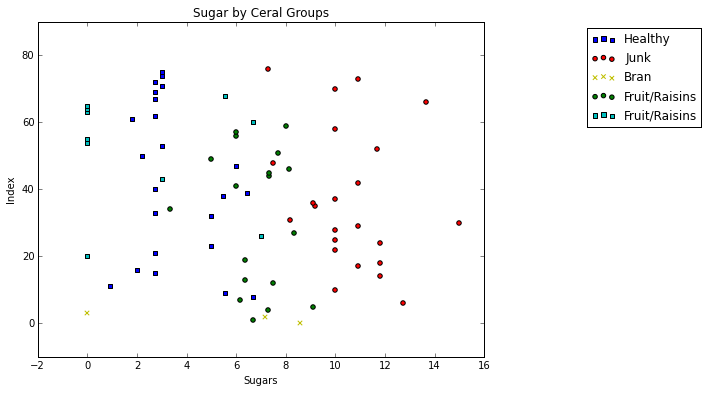

In [110]:
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)

ax1.scatter(group5_zero.sugars, group5_zero.index, c='b', marker="s", label='Healthy')
ax1.scatter(group5_one.sugars,group5_one.index, c='r', marker="o", label='Junk')
ax1.scatter(group5_two.sugars,group5_two.index, c='y', marker="x", label='Bran')
ax1.scatter(group5_three.sugars,group5_three.index, c='g', marker="o", label='Fruit/Raisins')
ax1.scatter(group5_four.sugars,group5_four.index, c='c', marker="s", label='Wheat')
ax1.legend(bbox_to_anchor=(1.5, 1))
# plt.legend(loc=('best'))
plt.ylabel('Index')
plt.xlabel('Sugars')
plt.title("Sugar by Cereal Groups")
plt.show()

Plotting just sugar you can see the difference in the clusters. 

##Means Shift

In [105]:
bandwidth = estimate_bandwidth(df_scaled)
ms = MeanShift(bandwidth=bandwidth)
ms.fit(df_scaled)
ms_predicted_groups = ms.predict(df_scaled)
ms_predicted_groups

array([2, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0])

In [106]:
df['MeanShift'] = ms_predicted_groups

In [107]:
df.groupby('MeanShift').count()['name']

MeanShift
0    68
1     6
2     2
3     1
Name: name, dtype: int64

The bandwidth needs more adjustment.